In [1]:
import os,codecs
import pandas as pd
import nltk
from nltk import*
import matplotlib.pyplot as plt
import string
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/ganiyuopeyemi/desktop/NLP/denn_bawl_german.txt', error_bad_lines=False)
df.head()

,WORD,Val,Val_sd,joy,joy_sd,anger,anger_sd,sadness,sadness_sd,fear,fear_sd,disgust,disgust_sd
0,abart,"-1,6","0,6992059","1,4762","0,98076744","1,7143","1,0556","1,7143","1,1019","1,8095","0,9284","2,4762","1,3645"
1,abbau,-1,"1,1697953","1,25","0,7163504","2,4","1,1425","2,35","1,2258","2,3","1,4179","1,5","0,8272"
2,abbild,"-0,2","0,63245553","1,8636","1,03718734","1,4545","1,0108","1,2273","0,5284","1,3636","0,9021","1,3182","0,9455"
3,abbruch,"-0,7","1,15950181","1,1","0,30779351","2,55","1,3169","1,7","0,9234","2,15","1,268","1,2","0,6959"
4,abdruck,"-0,1","0,31622777","1,4","0,75393703","1,2","0,5231","1,1","0,4472",1,0,1,0


In [3]:
df.shape

(1958, 13)

In [4]:
#German words, including nouns (2,107), verbs (504), and adjectives (291)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   WORD        1958 non-null   object
 1   Val         1958 non-null   object
 2   Val_sd      1958 non-null   object
 3   joy         1958 non-null   object
 4   joy_sd      1958 non-null   object
 5   anger       1958 non-null   object
 6   anger_sd    1958 non-null   object
 7   sadness     1958 non-null   object
 8   sadness_sd  1958 non-null   object
 9   fear        1958 non-null   object
 10  fear_sd     1958 non-null   object
 11  disgust     1958 non-null   object
 12  disgust_sd  1958 non-null   object
dtypes: object(13)
memory usage: 199.0+ KB


In [6]:
df.dtypes

WORD          object
Val           object
Val_sd        object
joy           object
joy_sd        object
anger         object
anger_sd      object
sadness       object
sadness_sd    object
fear          object
fear_sd       object
disgust       object
disgust_sd    object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   WORD        1958 non-null   object
 1   Val         1958 non-null   object
 2   Val_sd      1958 non-null   object
 3   joy         1958 non-null   object
 4   joy_sd      1958 non-null   object
 5   anger       1958 non-null   object
 6   anger_sd    1958 non-null   object
 7   sadness     1958 non-null   object
 8   sadness_sd  1958 non-null   object
 9   fear        1958 non-null   object
 10  fear_sd     1958 non-null   object
 11  disgust     1958 non-null   object
 12  disgust_sd  1958 non-null   object
dtypes: object(13)
memory usage: 199.0+ KB


In [8]:
df = df.apply(lambda x: x.str.replace(',','.'))
cols = df.columns.drop("WORD")
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

In [9]:
#TC = '250kSentiArt_EN.xlsx' 
sa = pd.read_excel('/Users/ganiyuopeyemi/desktop/NLP/SentiArt-main/120kSentiArt_DE.xlsx') #    
print(sa)

              word      wordLC    AAPz  ang_z  fear_z  disg_z   hap_z   sad_z  \
0           Aachen      aachen  0.6557  0.097 -1.0980 -1.2940 -0.4470 -1.3020   
1              Aal         aal  0.3076  0.234 -0.4620  1.4168 -0.1940  0.1161   
2             Aale        aale  0.0619  0.218 -0.1440  0.4773 -0.1210 -0.1830   
3              Aas         aas -1.0440  0.258  0.1618  2.0333  0.3128  0.3957   
4       Aasfresser  aasfresser -1.5150  0.327  1.1859  1.9843  0.2766  0.6850   
...            ...         ...     ...    ...     ...     ...     ...     ...   
116308     üppigem     üppigem  2.1710  0.152 -1.6270 -0.1590  0.9881  0.3765   
116309     üppigen     üppigen  2.0481  0.127 -1.6160 -0.7360  0.4093  0.0004   
116310     üppiger     üppiger  2.0276  0.143 -1.5920 -0.6580  0.6143  0.1836   
116311   üppigeren   üppigeren  1.5157  0.078 -1.6630 -1.2940 -0.3500 -0.7420   
116312     üppiges     üppiges  1.6386  0.134 -1.5450 -0.3550  0.6625 -0.1350   

        surp_z  
0      -0.

In [10]:
word_AAPz = []
word_ang_z = []
word_fear_z = []
word_disg_z = []
word_hap_z = []
word_sad_z = []
word_surp_z = []

In [11]:
for t in df.WORD:
    dt = sa.query('wordLC in @t')
    word_AAPz.append(dt.AAPz.mean())
    word_ang_z.append(dt.ang_z.mean())
    word_fear_z.append(dt.fear_z.mean())
    word_disg_z.append(dt.disg_z.mean())
    word_hap_z.append(dt.hap_z.mean())
    word_sad_z.append(dt.sad_z.mean())
    word_surp_z.append(dt.surp_z.mean())



In [12]:
df['AAPz'] = word_AAPz
df['ang_z'] = word_ang_z
df['fear_z'] = word_fear_z
df['disg_z'] = word_disg_z
df['hap_z'] = word_hap_z
df['sad_z'] = word_sad_z
df['surp_z'] = word_surp_z
df = round(df,3)

In [13]:
df.isna().sum()

WORD            0
Val             0
Val_sd          0
joy             0
joy_sd          0
anger           0
anger_sd        0
sadness         0
sadness_sd      0
fear            0
fear_sd         0
disgust         0
disgust_sd      0
AAPz          145
ang_z         145
fear_z        145
disg_z        145
hap_z         145
sad_z         145
surp_z        145
dtype: int64

In [14]:
df = df.drop(columns=['Val_sd','joy_sd','fear_sd','anger_sd','sadness_sd','disgust_sd'], axis=1)

In [15]:
word_list = []
for word in df.WORD:
    word_list.append(word)

In [16]:
print(len(word_list))
print(len(set(word_list)))

1958
1958


In [17]:
st_words = []
for word in sa.wordLC:
    st_words.append(word)

In [18]:
print(len(st_words))
print(len(set((st_words))))

116313
116313


In [19]:
match = []
for word in word_list:
    if word in st_words:
        match.append(word)

In [20]:
print(len(match))
print(len(set(match)))

1813
1813


In [21]:
(len(set(match))/len(set(word_list)))*100

92.59448416751788

In [22]:
df = df.dropna().reset_index(drop=True)

In [23]:
corrMatrix = df[['Val', 'joy', 'anger', 'sadness', 'fear', 'disgust']].corr()
corrMatrix

,Val,joy,anger,sadness,fear,disgust
Val,1.000000,0.835330,-0.721242,-0.504486,-0.643262,-0.444431
joy,0.835330,1.000000,-0.517698,-0.271411,-0.420272,-0.335091
anger,-0.721242,-0.517698,1.000000,0.548810,0.619848,0.367870
sadness,-0.504486,-0.271411,0.548810,1.000000,0.703243,0.307711
fear,-0.643262,-0.420272,0.619848,0.703243,1.000000,0.390473
disgust,-0.444431,-0.335091,0.367870,0.307711,0.390473,1.000000


In [24]:
corrMatrix_s = df[["AAPz", "ang_z", "fear_z", "disg_z","hap_z","hap_z","sad_z","surp_z"]].corr()
corrMatrix_s

,AAPz,ang_z,fear_z,disg_z,hap_z,hap_z,sad_z,surp_z
AAPz,1.000000,-0.504830,-0.554673,-0.424148,0.149612,0.149612,-0.178172,-0.021142
ang_z,-0.504830,1.000000,0.868058,0.788438,0.615961,0.615961,0.812234,0.495355
fear_z,-0.554673,0.868058,1.000000,0.739082,0.569993,0.569993,0.768103,0.472010
disg_z,-0.424148,0.788438,0.739082,1.000000,0.576293,0.576293,0.790653,0.407557
hap_z,0.149612,0.615961,0.569993,0.576293,1.000000,1.000000,0.768649,0.611362
hap_z,0.149612,0.615961,0.569993,0.576293,1.000000,1.000000,0.768649,0.611362
sad_z,-0.178172,0.812234,0.768103,0.790653,0.768649,0.768649,1.000000,0.515230
surp_z,-0.021142,0.495355,0.472010,0.407557,0.611362,0.611362,0.515230,1.000000


In [70]:
#from sklearn.linear_model import LinearRegression
from scipy import stats

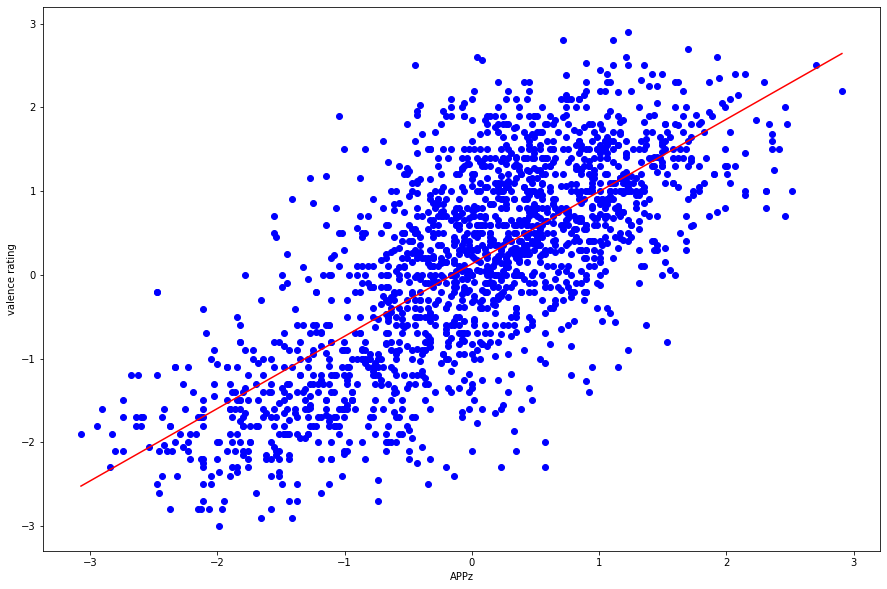

Gradient =  0.864
R-squared=  0.725
p_value=  0.0
std_err=  0.019


In [71]:
x = df["AAPz"]
y = df["Val"]
gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1 = gradient*x1 + intercept
plt.plot(x,y,'ob')
plt.plot(x1, y1,'-r')
plt.xlabel("APPz")
plt.ylabel("valence rating")
plt.show()
print("Gradient = ", round(gradient, 3))
print("R-squared= ", round(r_value, 3))
print("p_value= ", round(p_value, 3))
print("std_err= ", round(std_err, 3))

Positive relation visible between AAPz and Valence rating

Interpretation
1. between both indicators exist a fairly strong positive correlation
2. normal as Valence rating is a part of Affective-Aesthetic Potential
3. some outliers are in the data but in this case they do have no direct influence on relation

In [27]:
df_categories = pd.DataFrame()

In [28]:
df_categories["Val"] = pd.cut(df["Val"], bins = 3, labels=[1, 2, 3])
df_categories["joy"] = pd.cut(df["joy"], bins = 3, labels=[1, 2, 3])
df_categories["anger"] = pd.cut(df["anger"], bins = 3, labels=[1, 2, 3])
df_categories["sadness"] = pd.cut(df["sadness"], bins = 3, labels=[1, 2, 3])
df_categories["fear"] = pd.cut(df["fear"], bins = 3, labels=[1, 2, 3])
df_categories["disgust"] = pd.cut(df["disgust"], bins = 3, labels=[1, 2, 3])
df_categories["AAPz"] = pd.cut(df["AAPz"], bins = 3, labels=[1, 2, 3])
df_categories["ang_z"] = pd.cut(df["ang_z"], bins = 3, labels=[1, 2, 3])
df_categories["fear_z"] = pd.cut(df["fear_z"], bins = 3, labels=[1, 2, 3])
df_categories["disg_z"] = pd.cut(df["disg_z"], bins = 3, labels=[1, 2, 3])
df_categories["hap_z"] = pd.cut(df["hap_z"], bins = 3, labels=[1, 2, 3])
df_categories["sad_z"] = pd.cut(df["sad_z"], bins = 3, labels=[1, 2, 3])

In [29]:
df_categories.head()

,Val,joy,anger,sadness,fear,disgust,AAPz,ang_z,fear_z,disg_z,hap_z,sad_z
0,1,1,1,1,1,2,2,1,1,2,1,2
1,2,1,2,2,2,1,2,1,1,1,1,1
2,2,1,1,1,1,1,2,1,1,1,1,2
3,2,1,2,1,2,1,2,1,1,1,1,1
4,2,1,1,1,1,1,2,1,1,1,1,1


In [30]:
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score,f1_score

f1_macro : 0.641
accuracy: 66.189 %


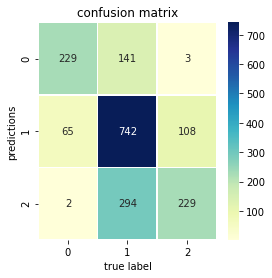

In [31]:
f1_macro = f1_score(df_categories["Val"], df_categories["AAPz"], average="macro")
acc = accuracy_score(df_categories["Val"], df_categories["AAPz"])*100
print("f1_macro :", round(f1_macro, 3))
print("accuracy:", round(acc,3), "%")
confusion_matrix = metrics.confusion_matrix(df_categories["Val"], df_categories["AAPz"])
f,ax = plt.subplots(figsize=(4,4))
sns.heatmap(confusion_matrix, annot=True, linewidths=.5, fmt= "d",ax=ax, cmap="YlGnBu");
plt.title("confusion matrix")
plt.xlabel("true label");
plt.ylabel("predictions");

In [32]:
f1_macro = f1_score(df_categories["joy"], df_categories["hap_z"], average="macro")
acc = accuracy_score(df_categories["joy"], df_categories["hap_z"])*100
print("f1_macro :", round(f1_macro, 3))
print("accuracy:", round(acc,3), "%")


f1_macro : 0.317
accuracy: 59.901 %


In [33]:
f1_macro = f1_score(df_categories["anger"], df_categories["ang_z"], average="macro")
acc = accuracy_score(df_categories["anger"], df_categories["ang_z"])*100
print("f1_macro :", round(f1_macro, 3))
print("accuracy:", round(acc,3), "%")

f1_macro : 0.449
accuracy: 68.064 %


In [34]:
f1_macro = f1_score(df_categories["sadness"], df_categories["sad_z"], average="macro")
acc = accuracy_score(df_categories["sadness"], df_categories["sad_z"])*100
print("f1_macro :", round(f1_macro, 3))
print("accuracy:", round(acc,3), "%")


f1_macro : 0.265
accuracy: 37.121 %


In [35]:
f1_macro = f1_score(df_categories["fear"], df_categories["fear_z"], average="macro")
acc = accuracy_score(df_categories["fear"], df_categories["fear_z"])*100
print("f1_macro :", round(f1_macro, 3))
print("accuracy:", round(acc,3), "%")

f1_macro : 0.415
accuracy: 73.469 %


In [36]:
f1_macro = f1_score(df_categories["disgust"], df_categories["disg_z"], average="macro")
acc = accuracy_score(df_categories["disgust"], df_categories["disg_z"])*100
print("f1_macro :", round(f1_macro, 3))
print("accuracy:", round(acc,3), "%")

f1_macro : 0.382
accuracy: 70.877 %


# Evaluating the performance of SentiArt: The Polarity
The neutral words in Denn_BAWL have scores between -0.5 and 0.5
The neutral words according to APPz in SentiArt have scores between -0.05 and 0.05

In [37]:
polarity = pd.DataFrame()
polarity["true"] = np.where((df["Val"] <= - 0.5), -1, np.where((df["Val"] >= 0.5), 1, 0))
polarity["predicted"] = np.where((df["AAPz"] <= - 0.05), -1, np.where((df["AAPz"] >= 0.05), 1, 0))

In [38]:
polarity.head()

,true,predicted
0,-1,-1
1,-1,-1
2,0,1
3,-1,-1
4,0,1


In [39]:
polarity["true"].value_counts()

 1    794
-1    562
 0    457
Name: true, dtype: int64

In [40]:
polarity["predicted"].value_counts()

 1    924
-1    812
 0     77
Name: predicted, dtype: int64

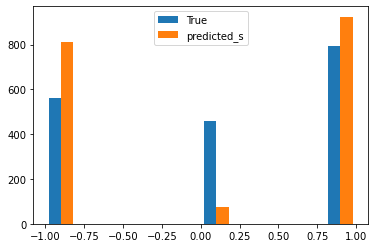

In [41]:
plt.hist([polarity.true, polarity.predicted], label=["True", "predicted_s"])
plt.legend(loc= "upper center")
plt.show()

f1_macro : 0.51
accuracy: 62.438 %


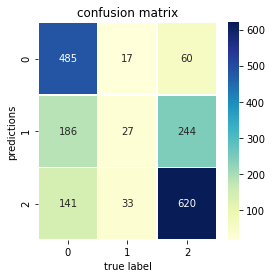

In [42]:
f1_macro = f1_score(polarity["true"], polarity["predicted"], average="macro")
acc = accuracy_score(polarity["true"], polarity["predicted"])*100
print("f1_macro :", round(f1_macro, 3))
print("accuracy:", round(acc,3), "%")
confusion_matrix = metrics.confusion_matrix(polarity["true"], polarity["predicted"])
f,ax = plt.subplots(figsize=(4,4))
sns.heatmap(confusion_matrix, annot=True, linewidths=.5, fmt= "d",ax=ax, cmap="YlGnBu");
plt.title("confusion matrix")
plt.xlabel("true label");
plt.ylabel("predictions");

In [43]:
joy_t = df.nlargest(10, "joy")
joy_t["WORD"]

1437       sonne
946         meer
1436      sommer
471     freizeit
861        liebe
476      frieden
473       freund
920         mama
1446        spaß
423       ferien
Name: WORD, dtype: object

In [44]:
joy_p = df.nlargest(10, "hap_z") #spaß (common), trauer, wehmut, ungeduld!
joy_p["WORD"]

472       freude
1446        spaß
895         lust
1756       wonne
1720      wehmut
667        jubel
1614    ungeduld
630     hoffnung
1059     neugier
1574      trauer
Name: WORD, dtype: object

In [45]:
fear_t = df.nlargest(10, "fear")
fear_t["WORD"]

1597       tumor
785        krieg
547      giftgas
822       lawine
64      alptraum
120      atemnot
245        bombe
1537      terror
1300        ruin
1565        tote
Name: WORD, dtype: object

In [46]:
fear_p = df.nlargest(10, "fear_z")
fear_p["WORD"]

83         angst
485       furcht
1108       panik
1330       scham
24       abscheu
1081    ohnmacht
1369     schreck
1440      sorgen
357         ekel
1574      trauer
Name: WORD, dtype: object

In [47]:
df[df["WORD"] =="trauer"]

,WORD,Val,joy,anger,sadness,fear,disgust,AAPz,ang_z,fear_z,disg_z,hap_z,sad_z,surp_z
1574,trauer,-2.1,1.05,1.75,3.75,2.35,1.1,-0.675,0.675,4.388,3.022,4.28,4.986,1.741


count    1813.000000
mean       -0.010272
std         1.025491
min        -3.071000
25%        -0.634000
50%         0.082000
75%         0.717000
max         2.908000
Name: AAPz, dtype: float64


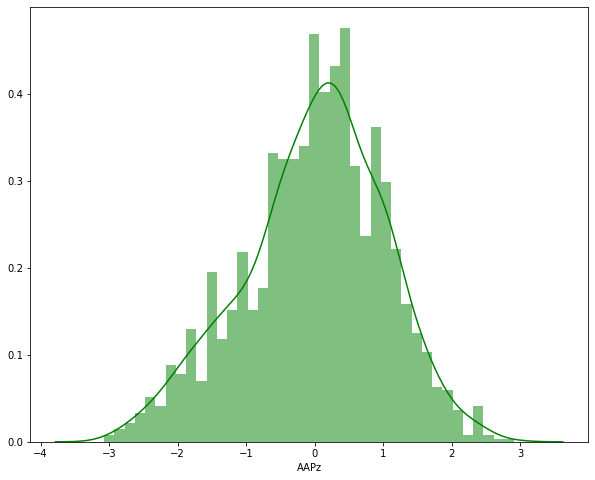

In [48]:
print(df['AAPz'].describe())
plt.figure(figsize=(10, 8))
sns.distplot(df['AAPz'], color='g', bins=40, hist_kws={'alpha': 0.5});

Interpretation
1. Indicator of AAPz measures is in group/range between -3 to 3
2. X-axis show the distribution of APPz 
3. Y-axis shows the density of distribution of mean
4. The distribution of APPz has one density peak which is in between 0 and 1  

count    1813.000000
mean        0.121178
std         1.221120
min        -3.000000
25%        -0.800000
50%         0.300000
75%         1.050000
max         2.900000
Name: Val, dtype: float64


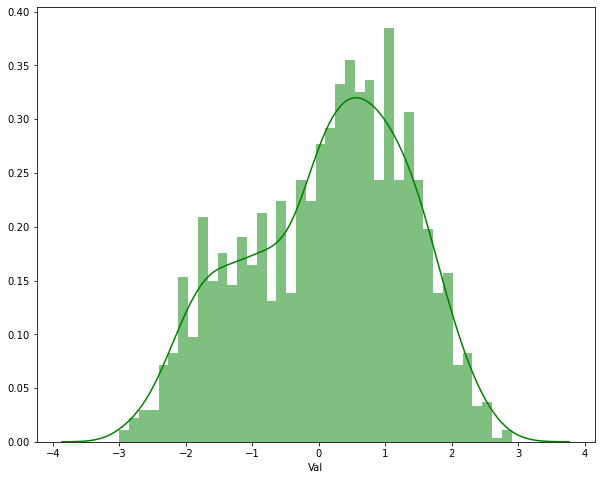

In [49]:
print(df['Val'].describe())
plt.figure(figsize=(10, 8))
sns.distplot(df['Val'], color='g', bins=40, hist_kws={'alpha': 0.5});

Interpretation
1. Indicator of Valence rating measures is in group/range between -3 to 3
2. X-axis show the distribution of Valence ratings 
3. Y-axis shows the density of distribution of mean
4. The distribution of APPz has one density peak which is in between 0 and 1  

In [50]:
df_1=df[["WORD","AAPz","Val"]]

In [51]:
import matplotlib as mpl

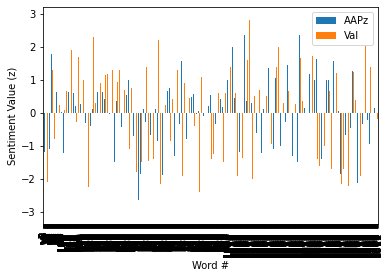

In [52]:
df_1.plot(kind="bar")
mpl.rcParams['figure.figsize'] = 15, 10
plt.xlabel("Word #")
plt.ylabel("Sentiment Value (z)")
plt.show()

In [53]:
#file = "NRC-Emotion-Lexicon-v0.92-In105Languages-Nov2017Translations.xlsx"
emolex_df = pd.read_excel("/Users/ganiyuopeyemi/desktop/NRC-Emotion-Lexicon-v0.92-In105Languages-Nov2017Translations.xlsx"
                        ,error_bad_lines=False,encoding= 'unicode_escape',)
emolex_df.head(10)

,English (en),Afrikaans (af),Albanian (sq),Amharic (am),Arabic (ar),Armenian (hy),Azeerbaijani (az),Basque (eu),Belarusian (be),Bengali (bn),...,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,aback,uit die veld geslaan,prapa,ተጭኗል,الى الوراء,շեղում,sanki,aback,ззаду,পশ্চাতে,...,0,0,0,0,0,0,0,0,0,0
1,abacus,abakus,numërator,abacus,طبلية تاج,անբավարարություն,abacus,abako,абака,গণনা-যন্ত্রবিশেষ,...,0,0,0,0,0,0,0,0,0,1
2,abandon,verlaat,braktis,ውጣ,تخلى,լքել,tərk et,bertan behera,адмовіцца ад,বর্জিত করা,...,0,1,0,0,0,1,0,1,0,0
3,abandoned,verlate,braktisur,ተትቷል,مهجور,լքված,tərk etdi,abandonatutako,закінуты,পরিত্যক্ত,...,0,1,1,0,0,1,0,1,0,0
4,abandonment,verlating,braktisje,ማቋረጥ,التخلي عن,հրաժարվելով,ləğv,abandono,пакіданне,বিসর্জন,...,0,1,1,0,0,1,0,1,1,0
5,abate,bedaar,i jap fund,አጥፋ,انحسر,քանդել,boşaltın,abate,сціхаць,ক্ষীণ করা,...,0,0,0,0,0,0,0,0,0,0
6,abatement,vermindering,pakësim,መበስበስ,انحسار,նվազեցում,azaldılması,murrizteko,зніжэнне,উপশম,...,0,0,0,0,0,0,0,0,0,0
7,abba,Abba,Abba,abba,أبا,abba,abba,abba,авва,Abba,...,1,0,0,0,0,0,0,0,0,0
8,abbot,abt,abat,አቡኝ,رئيس الدير,աբբոթ,abbot,abade,абат,মঠাধ্যক্ষ,...,0,0,0,0,0,0,0,0,0,1
9,abbreviate,afkort,shkurtoj,አህጽሮት,اختصر,կրճատել,qısaltmaq,laburtu,скарачаць,খাট করা,...,0,0,0,0,0,0,0,0,0,0


In [54]:
emolex_df = emolex_df[["German (de)","Positive","Negative","Anger","Anticipation","Disgust","Fear","Joy","Surprise","Trust"]]

In [55]:
emolex_df.head()

,German (de),Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Surprise,Trust
0,zurück,0,0,0,0,0,0,0,0,0
1,Abakus,0,0,0,0,0,0,0,0,1
2,verlassen,0,1,0,0,0,1,0,0,0
3,verlassen,0,1,1,0,0,1,0,0,0
4,Aufgabe,0,1,1,0,0,1,0,1,0


In [56]:
emolex_df = emolex_df.rename(columns = {'German (de)':'German'})

In [57]:
emolex_df.head()

,German,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Surprise,Trust
0,zurück,0,0,0,0,0,0,0,0,0
1,Abakus,0,0,0,0,0,0,0,0,1
2,verlassen,0,1,0,0,0,1,0,0,0
3,verlassen,0,1,1,0,0,1,0,0,0
4,Aufgabe,0,1,1,0,0,1,0,1,0


In [58]:
emolex_words = []
for word in emolex_df["German"]:
    emolex_words.append(word)

In [59]:
print(len(emolex_words))
print(len(set(emolex_words)))

14182
11340


In [60]:
print(len(word_list))

1958


In [61]:
match_1 = []
for word in word_list:
    if word in emolex_words:
        match_1.append(word)

In [62]:
print(len(set(match_1)))

9


In [63]:
(len(set(match_1))/len(set(word_list)))*100

0.45965270684371806

In [64]:
word_Pos = []
word_Neg = []

In [65]:
for t in df.WORD:
    dt = emolex_df.query('German in @t')
    word_Pos.append(dt.Positive.mean())
    word_Neg.append(dt.Negative.mean())
    



In [66]:
df["Neg_emo"] = word_Neg
df["Pos_emo"] = word_Pos

In [67]:
df.head()

,WORD,Val,joy,anger,sadness,fear,disgust,AAPz,ang_z,fear_z,disg_z,hap_z,sad_z,surp_z,Neg_emo,Pos_emo
0,abart,-1.6,1.476,1.714,1.714,1.810,2.476,-1.003,0.263,-0.027,1.348,-0.507,0.550,0.650,NaN,NaN
1,abbau,-1.0,1.250,2.400,2.350,2.300,1.500,-0.900,0.190,-0.497,-0.531,-1.713,-1.041,-2.129,NaN,NaN
2,abbild,-0.2,1.864,1.454,1.227,1.364,1.318,0.881,0.158,-0.639,0.194,-0.230,-0.154,-0.974,NaN,NaN
3,abbruch,-0.7,1.100,2.550,1.700,2.150,1.200,-0.552,0.174,-0.697,-0.540,-0.278,-0.366,-0.181,NaN,NaN
4,abdruck,-0.1,1.400,1.200,1.100,1.000,1.000,0.164,0.121,-1.780,-0.208,-0.977,-1.080,-1.194,NaN,NaN


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1813 entries, 0 to 1812
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   WORD     1813 non-null   object 
 1   Val      1813 non-null   float64
 2   joy      1813 non-null   float64
 3   anger    1813 non-null   float64
 4   sadness  1813 non-null   float64
 5   fear     1813 non-null   float64
 6   disgust  1813 non-null   float64
 7   AAPz     1813 non-null   float64
 8   ang_z    1813 non-null   float64
 9   fear_z   1813 non-null   float64
 10  disg_z   1813 non-null   float64
 11  hap_z    1813 non-null   float64
 12  sad_z    1813 non-null   float64
 13  surp_z   1813 non-null   float64
 14  Neg_emo  9 non-null      float64
 15  Pos_emo  9 non-null      float64
dtypes: float64(15), object(1)
memory usage: 226.8+ KB


In [69]:
valence_emo=[]
for t in df.WORD:
    dt = emolex_df.query("German in @t")
    if dt.Positive.mean()==1:
        valence_emo.append("positive")
    elif dt.Negative.mean()==1:
        valence_emo.append("negative")
    elif dt.Negative.mean()==0 and dt.Positive.mean()==0:
        valence_emo.append("neutral")
    else:
        valence_emo.append("NaN")
print("len(valence_emo)=", len(valence_emo))        
print(Counter(valence_emo))      

len(valence_emo)= 1813
Counter({'NaN': 1804, 'neutral': 4, 'negative': 3, 'positive': 2})
